<a href="https://colab.research.google.com/github/srimugunth2/GRIP-Tasks/blob/main/GRIP_T1_Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Grip/student_scores - student_scores.csv')

In [ ]:
print(df.columns)

Index(['Hours', 'Scores'], dtype='object')


**Data Visualization in a Graph**

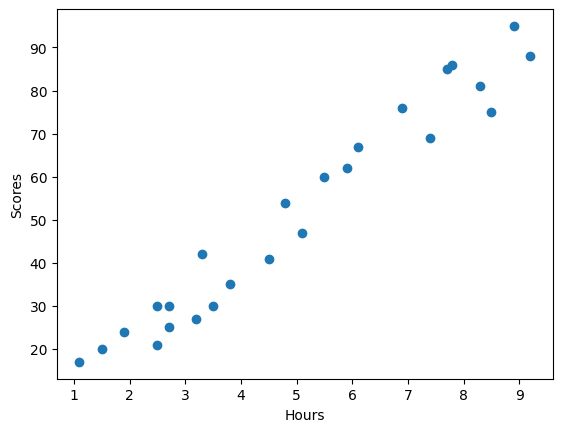

In [ ]:
# Plot a scatter plot of the two columns
plt.scatter(df['Hours'], df['Scores'])

# Add labels to the axes
plt.xlabel('Hours')
plt.ylabel('Scores')
# Show the plot
plt.show()

**Data Preparation**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

**Training of the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


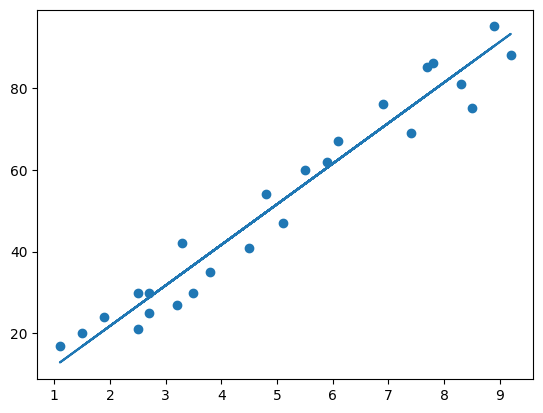

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Predictions Making**

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Model Testing**

In [ ]:
# Reshape the input to a 2D array      #Number of study hours = 9.25
hours = np.array(9.25).reshape(-1, 1)

# Make the prediction
own_pred = regressor.predict(hours)

# Print the results
print("No of Hours = {}".format(hours[0, 0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [ ]:
hours = np.array(7).reshape(-1, 1)    #Number of study hours = 7

# Make the prediction
own_pred = regressor.predict(hours)

# Print the results
print("No of Hours = {}".format(hours[0, 0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 7
Predicted Score = 71.39275540593033


In [ ]:
hours = np.array(8).reshape(-1, 1)   #Number of study hours = 8

# Make the prediction
own_pred = regressor.predict(hours)

# Print the results
print("No of Hours = {}".format(hours[0, 0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 8
Predicted Score = 81.30341188657258


**Model Evaluation**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
